<a href="https://colab.research.google.com/github/SajjadNoruzi/deepLearning_with_Python/blob/main/dogs_cats_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''

# Mount your Google Drive.
from google.colab import drive
drive.mount("/content/drive")

kaggle_creds_path = "PATH_TO_YOUR_TOKEN"

! pip install kaggle --quiet

! mkdir ~/.kaggle
! cp PATH_TO_YOUR_TOKEN ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! kaggle competitions download -c {competition_name}

! mkdir kaggle_data
! unzip {competition_name + ".zip"} -d kaggle_data

# Unmount your Google Drive
drive.flush_and_unmount()

'''

In [ ]:
!pip install kaggle

In [4]:
#!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d biaiscience/dogs-vs-cats

 99% 806M/817M [00:09<00:00, 125MB/s] 
100% 817M/817M [00:09<00:00, 91.4MB/s]


In [7]:
! mkdir kaggle_data
! unzip {"/content/dogs-vs-cats.zip"} -d kaggle_data

Streaming output truncated to the last 5000 lines.
  inflating: kaggle_data/train/train/dog.5499.jpg  
  inflating: kaggle_data/train/train/dog.55.jpg  
  inflating: kaggle_data/train/train/dog.550.jpg  
  inflating: kaggle_data/train/train/dog.5500.jpg  
  inflating: kaggle_data/train/train/dog.5501.jpg  
  inflating: kaggle_data/train/train/dog.5502.jpg  
  inflating: kaggle_data/train/train/dog.5503.jpg  
  inflating: kaggle_data/train/train/dog.5504.jpg  
  inflating: kaggle_data/train/train/dog.5505.jpg  
  inflating: kaggle_data/train/train/dog.5506.jpg  
  inflating: kaggle_data/train/train/dog.5507.jpg  
  inflating: kaggle_data/train/train/dog.5508.jpg  
  inflating: kaggle_data/train/train/dog.5509.jpg  
  inflating: kaggle_data/train/train/dog.551.jpg  
  inflating: kaggle_data/train/train/dog.5510.jpg  
  inflating: kaggle_data/train/train/dog.5511.jpg  
  inflating: kaggle_data/train/train/dog.5512.jpg  
  inflating: kaggle_data/train/train/dog.5513.jpg  
  inflating: kagg

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os,shutil,pathlib



original_dataset_dir = pathlib.Path("/content/kaggle_data/train/train")
new_base_dir=pathlib.Path('/content/my_data/dogs-vs-cats-small')

def make_subset(subset_name,start_index,end_index):
    for category in ('cat','dog'):
        dir=new_base_dir/subset_name/category
        os.makedirs(dir)
        fnames=[f"{category}.{i}.jpg"
            for i in range(start_index,end_index)]

        for fname in fnames:
            shutil.copyfile(src=original_dataset_dir/fname,dst=dir/fname)

make_subset('train',start_index=0,end_index=1000)
make_subset('validation',start_index=1000,end_index=1500)
make_subset('test',start_index=1500,end_index=2500)

In [12]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [10]:
#Using image_dataset_from_directory to read images

from tensorflow.keras.utils import image_dataset_from_directory

train_dataset=image_dataset_from_directory(
    new_base_dir/'train',
    image_size=(180,180),
    batch_size=32)

validation_dataset=image_dataset_from_directory(
    new_base_dir/'validation',
    image_size=(180,180),
    batch_size=32)

test_dataset=image_dataset_from_directory(
    new_base_dir/'test',
    image_size=(180,180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [11]:
#Define a data augmentation stage to add to an image model
data_augmentation=keras.Sequential(
    [
        layers.RandomFlip('horizontal'),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

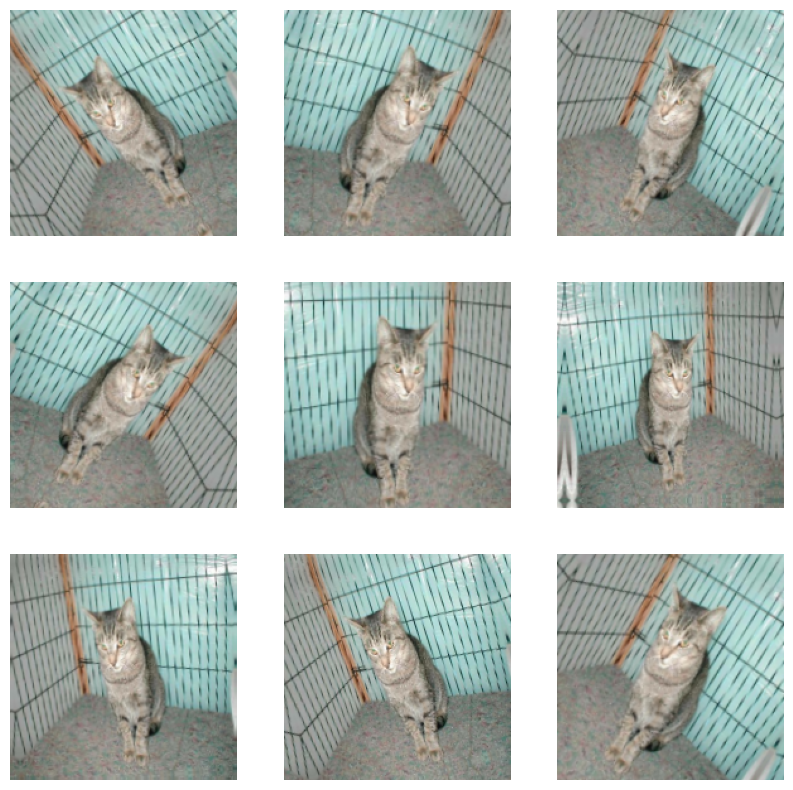

In [13]:

plt.figure(figsize=(10,10))
for image,_ in train_dataset.take(1):
  for i in range(9):
    augmentation_image=data_augmentation(image)
    ax=plt.subplot(3,3,i+1)
    plt.imshow(augmentation_image[0].numpy().astype('uint8'))
    plt.axis('off')


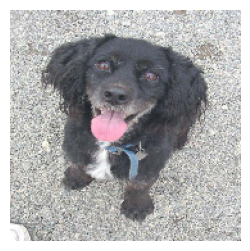

tf.Tensor([1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0], shape=(32,), dtype=int32)


In [27]:
cunt=1
for images,b in train_dataset.take(1):
  plt.figure(figsize=(3,3))
  plt.imshow(images[0].numpy().astype('uint8'))
  plt.axis("off")
  plt.show()
  print(b)

In [29]:
#Creating a simple CNN model (sequential)

inputs=keras.Input(shape=(180,180,3))
x=data_augmentation(inputs)
x=layers.Rescaling(1./255)(x)
x=layers.Conv2D(filters=32,kernel_size=3,activation='relu')(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=64,kernel_size=3,activation='relu')(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=128,kernel_size=3,activation='relu')(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=256,kernel_size=3,activation='relu')(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=256,kernel_size=3,activation='relu')(x)
#x=layers.MaxPooling(pool_size=2)(x)
x=layers.Flatten()(x)
x=layers.Dropout(0.5)(x)
outputs=layers.Dense(1,activation='sigmoid')(x)
model=keras.Model(inputs=inputs,outputs=outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (32, 180, 180, 3)         0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                             

In [31]:
#Configuring the model for training
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
callbacks = [
  keras.callbacks.ModelCheckpoint(
  filepath="convnet_from_scratch_with_augmentation.keras",
  save_best_only=True,
  monitor="val_loss")
  ]
history = model.fit(
                  train_dataset,
                  epochs=60,
                  validation_data=validation_dataset,
                  callbacks=callbacks)